In [29]:

#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice end formatting
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA


In [30]:
# Read the dataset into a pandas DataFrame object
df = pd.read_csv("/Users/arib/Downloads/rwf577.csv")
df


,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [31]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['Reduction'] = df['Reduction'].map({'No':0, 'Yes':1})

In [32]:

df_f = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
#Confirm those variables were sucessfully dropped
df_f


,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [33]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Reduction'] = le.fit_transform(res_df['Reduction'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df_f)

In [34]:


#Selecting features
X = encoded_df.drop(['Reduction'],axis =1)
y = encoded_df['Reduction']
y


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Reduction, Length: 1470, dtype: int64

In [35]:

#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))


Mean: (0, 0)
Standard deviation: (1, 1)


In [36]:

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)


In [37]:


start = time.time()

#Polynomial Kernel
svc_poly = SVC(kernel = 'poly')
#Fit the model with data
svc_poly.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM with polynomial kernel:',svm_time)

y_pred_poly = svc_poly.predict(X_test)

print('Polynomial Accuracy Score:',accuracy_score(y_test,y_pred_poly))



Train Time (seconds) of SVM with polynomial kernel: 0.0766298770904541
Polynomial Accuracy Score: 0.8614130434782609


In [38]:

start = time.time()

#Linear Kernel
svc_linear = SVC(kernel = 'linear')
#Fit the model with data
svc_linear.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM linear Kernel:',svm_time)

y_pred_linear = svc_linear.predict(X_test)

print('Linear Accuracy Score:',accuracy_score(y_test,y_pred_linear))


Train Time (seconds) of SVM linear Kernel: 0.07768511772155762
Linear Accuracy Score: 0.845108695652174


In [39]:

start = time.time()

#Polynomial Kernel
svc_poly = SVC(kernel = 'poly')
#Fit the model with data
svc_poly.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM with polynomial kernel:',svm_time)

y_pred_poly = svc_poly.predict(X_test)

print('Polynomial Accuracy Score:',accuracy_score(y_test,y_pred_poly))


Train Time (seconds) of SVM with polynomial kernel: 0.06459283828735352
Polynomial Accuracy Score: 0.8614130434782609


In [40]:

start = time.time()

#Radial Kernel
svc_rad = SVC(kernel = 'rbf', probability = True)
#Fit the model with data
svc_rad.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM with radial kernel:',svm_time)

y_pred_rad = svc_rad.predict(X_test)


Train Time (seconds) of SVM with radial kernel: 0.25723814964294434


In [41]:

print("Accuracy:", accuracy_score(y_test,y_pred_rad))


Accuracy: 0.8668478260869565


Text(0.5, 427.9555555555555, 'Predicted label')

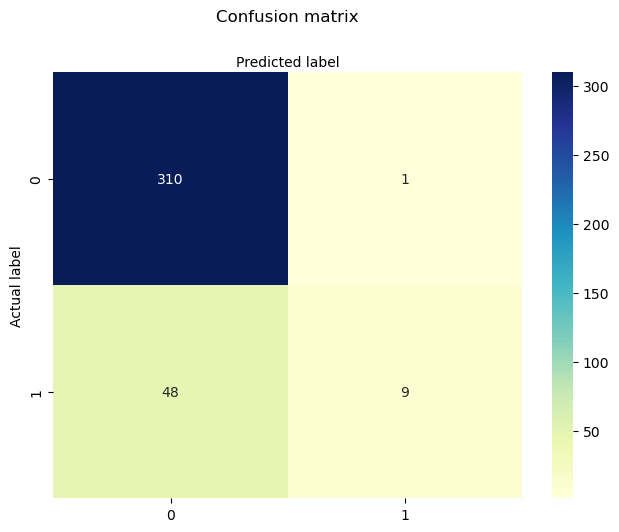

In [42]:

#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rad)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:

#Print a nicely formatted report
classify_svc = classification_report(y_test, y_pred_rad)
print("\nClassification Report")
print(classify_svc)



Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       0.90      0.16      0.27        57

    accuracy                           0.87       368
   macro avg       0.88      0.58      0.60       368
weighted avg       0.87      0.87      0.82       368



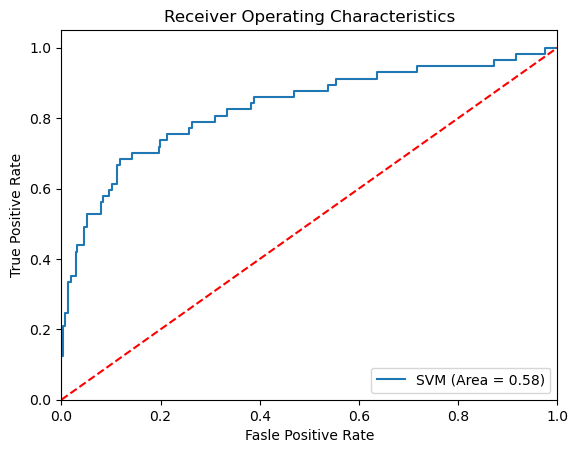

In [45]:


#Plot the ROC curve
svc_roc_auc = roc_auc_score(y_test,y_pred_rad)
fpr, tpr, thresholds = roc_curve(y_test,svc_rad.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()



In [46]:

# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

# Fit the PCA on the training set
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')



To retain 90 % of the variation, we needed 21 components


In [47]:
# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



In [48]:

# SVM with PCA

start = time.time()

svc_pca = SVC(kernel = 'rbf', probability = True)
svc_pca.fit(X_train_pca, y_train)

end = time.time()
svm_time_pca = end-start
print('Train Time (seconds) of SVM with PCA:',svm_time_pca)

y_pred_svc_pca = svc_pca.predict(X_test_pca)



Train Time (seconds) of SVM with PCA: 0.2552499771118164


In [49]:

print("Accuracy:", accuracy_score(y_test,y_pred_svc_pca))


Accuracy: 0.8559782608695652


Text(0.5, 427.9555555555555, 'Predicted label')

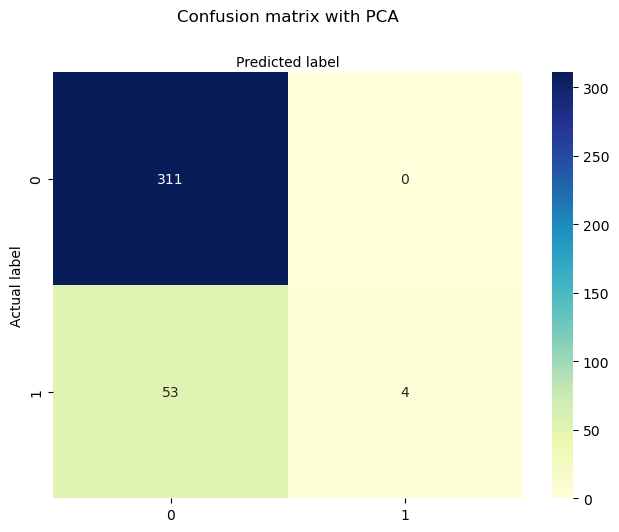

In [50]:

#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [51]:

classify_svc_pca = classification_report(y_test, y_pred_svc_pca)
print("\nClassification Report with PCA")
print(classify_svc_pca)



Classification Report with PCA
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       311
           1       1.00      0.07      0.13        57

    accuracy                           0.86       368
   macro avg       0.93      0.54      0.53       368
weighted avg       0.88      0.86      0.80       368



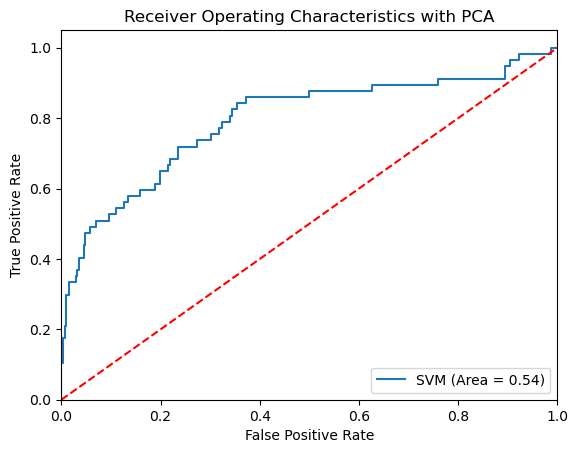

In [52]:

svc_roc_auc_pca = roc_auc_score(y_test,y_pred_svc_pca)
fpr, tpr, thresholds = roc_curve(y_test,svc_pca.predict_proba(X_test_pca)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics with PCA')
plt.legend(loc="lower right")
plt.show()
